In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('..\data\combined_data_scores.csv')

In [5]:
df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,yearmonth,title,index,hatebert_toxicity_score,hateXplain_toxicity_score,toxicbert_toxicity_score,average_toxicity_score
0,SUTD entry requirements is more or less the sa...,2020-01-01 00:00:33,Twrd4321,/r/singapore/comments/eia0ap/sit_suss_or_sutd/...,t3_eia0ap,t1_fcom49y,fconqf5,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020-01,sit suss or sutd,0,0.025175,0.024882,0.081147,0.043735
1,"With jam like this, it's barely worth it.",2020-01-01 00:01:05,557088,/r/singapore/comments/ei5a1u/how_congested_the...,t3_ei5a1u,t1_fcnh5ns,fconrxl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020-01,how congested the ecp is on new years day,1,0.025863,0.061604,0.015452,0.034306
2,"I outside now, I guess reaching there around 0...",2020-01-01 00:12:57,HeavyArmsJin,/r/singapore/comments/ei8j4h/whats_the_earlies...,t3_ei8j4h,t3_ei8j4h,fcooqwc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020-01,whats the earliest timing i can visit the guan,2,0.107604,0.066348,0.058293,0.077415
3,The female or male cry?,2020-01-01 00:12:59,Tempestuous-,/r/singapore/comments/ei9klf/rsingapore_random...,t3_ei9klf,t1_fcohcxx,fcoor03,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020-01,rsingapore random discussion and small questions,3,0.023615,0.062936,0.003137,0.029896
4,bring an umbrella! it gets really hot during t...,2020-01-01 00:13:37,WiisdomTooth,/r/singapore/comments/ei2z6d/what_is_there_to_...,t3_ei2z6d,t3_ei2z6d,fcoosvb,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '...",2020-01,what is there to prepare for a trip to st johns,4,0.058743,0.045377,0.022261,0.042127


In [8]:
# create year and month column
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month

In [9]:
monthly_agg = df.groupby(['year', 'month', 'subreddit_id']).agg({
    'hatebert_toxicity_score': ['mean', 'std', 'count'],
    'hateXplain_toxicity_score': ['mean', 'std'],
    'toxicbert_toxicity_score': ['mean', 'std'],
    'average_toxicity_score': ['mean', 'std'],
    'moderation': lambda x: (x == True).mean()  # Percentage of moderated content
}).reset_index()

In [10]:
# Flatten column names
monthly_agg.columns = ['_'.join(col).strip('_') for col in monthly_agg.columns.values]

In [11]:
# Rename columns for clarity
monthly_agg = monthly_agg.rename(columns={
    'hatebert_toxicity_score_count': 'post_count',
    'moderation_<lambda>': 'moderation_rate'
})

In [12]:
# Create datetime column for easier plotting
monthly_agg['date'] = pd.to_datetime(monthly_agg[['year', 'month']].assign(day=1))

In [13]:
# Display the results
print("\nPreprocessed dataset shape:", monthly_agg.shape)
print("\nColumns in preprocessed data:", monthly_agg.columns.tolist())
monthly_agg.head()


Preprocessed dataset shape: (105, 14)

Columns in preprocessed data: ['year', 'month', 'subreddit_id', 'hatebert_toxicity_score_mean', 'hatebert_toxicity_score_std', 'post_count', 'hateXplain_toxicity_score_mean', 'hateXplain_toxicity_score_std', 'toxicbert_toxicity_score_mean', 'toxicbert_toxicity_score_std', 'average_toxicity_score_mean', 'average_toxicity_score_std', 'moderation_rate', 'date']


,year,month,subreddit_id,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std,moderation_rate,date
0,2020,1,t5_2qh8c,0.064465,0.099206,74016,0.067740,0.100264,0.042808,0.033429,0.058338,0.052112,0.0,2020-01-01
1,2020,1,t5_xnx04,0.070629,0.127408,224,0.087292,0.127950,0.034513,0.031335,0.064145,0.074174,0.0,2020-01-01
2,2020,2,t5_2qh8c,0.063889,0.097053,83421,0.066328,0.097376,0.044682,0.033613,0.058300,0.051063,0.0,2020-02-01
3,2020,2,t5_xnx04,0.058199,0.085413,196,0.088519,0.144041,0.036089,0.031765,0.060936,0.065781,0.0,2020-02-01
4,2020,3,t5_2qh8c,0.064702,0.098732,94667,0.066013,0.096408,0.045651,0.033610,0.058789,0.050748,0.0,2020-03-01


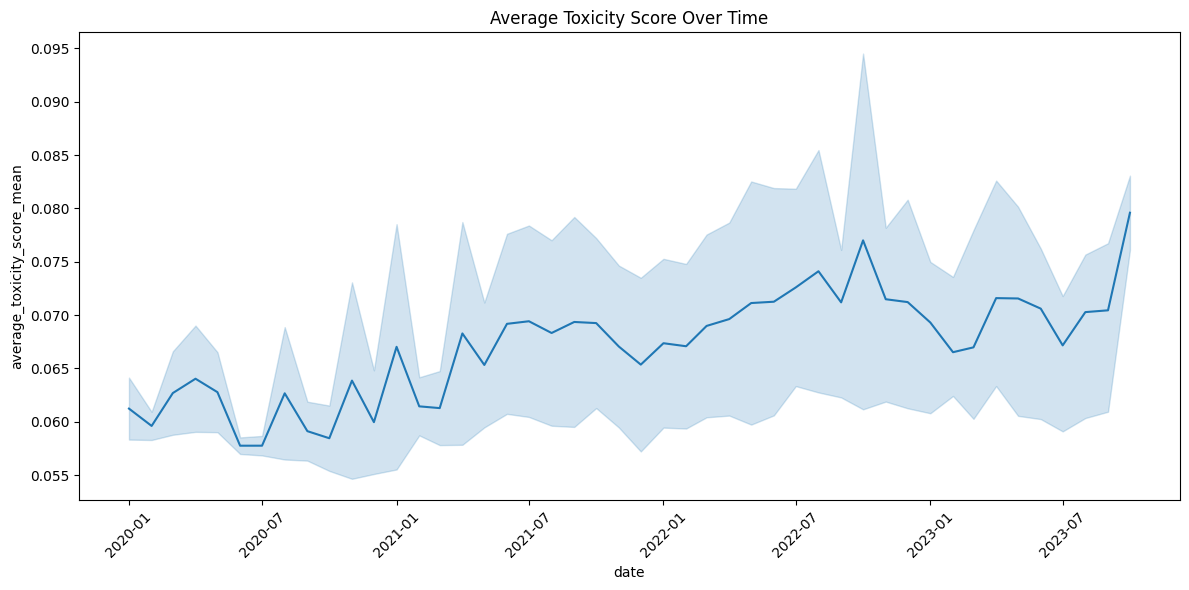

In [19]:
# Quick visualization to verify the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_agg, x='date', y='average_toxicity_score_mean')
plt.title('Average Toxicity Score Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Basic statistics of the preprocessed data
monthly_agg.describe()

,year,month,hatebert_toxicity_score_mean,hatebert_toxicity_score_std,post_count,hateXplain_toxicity_score_mean,hateXplain_toxicity_score_std,toxicbert_toxicity_score_mean,toxicbert_toxicity_score_std,average_toxicity_score_mean,average_toxicity_score_std,moderation_rate,date
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105
mean,2021.590476,6.333333,0.078381,0.122762,42898.371429,0.086339,0.128224,0.037918,0.032578,0.067546,0.067430,0.0,2022-01-12 21:42:51.428571392
min,2020.000000,1.000000,0.057536,0.085413,136.000000,0.063164,0.083796,0.020879,0.027099,0.054664,0.045716,0.0,2020-01-01 00:00:00
25%,2021.000000,3.000000,0.067176,0.101513,4747.000000,0.069236,0.101014,0.034390,0.032295,0.059742,0.053368,0.0,2021-02-01 00:00:00
50%,2022.000000,6.000000,0.072543,0.120564,17417.000000,0.085833,0.131877,0.036779,0.032977,0.064145,0.070418,0.0,2022-03-01 00:00:00
75%,2023.000000,9.000000,0.091016,0.144601,74637.000000,0.102558,0.151557,0.042971,0.033339,0.075326,0.081249,0.0,2023-01-01 00:00:00
max,2023.000000,12.000000,0.113713,0.174271,185173.000000,0.143656,0.206965,0.046424,0.033728,0.094501,0.103530,0.0,2023-10-01 00:00:00
std,1.123997,3.381700,0.013748,0.023421,44981.067915,0.018448,0.028344,0.005439,0.001192,0.008972,0.014934,0.0,NaN


In [22]:
# Save to CSV
output_path = '../data/monthly_summary.csv'
monthly_agg.to_csv(output_path, index=False)
print(f"\nSaved preprocessed data to: {output_path}")


Saved preprocessed data to: dashboard/data/monthly_summary.csv
